# Laboratory #4_1 : Image Classification using CNN

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks
*   Using pre-trained networks
*   Feature visualizations

**Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Create reusable functions where ever possible, so that the code could be reused at different places.
*   Mount your drive to access the images.
*   Add sufficient comments and explanations wherever necessary.

---

# **Colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [11]:
import tensorflow as tf
from keras import optimizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from keras.backend import clear_session
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import manifold
import seaborn as sns
import pandas as pd
import random

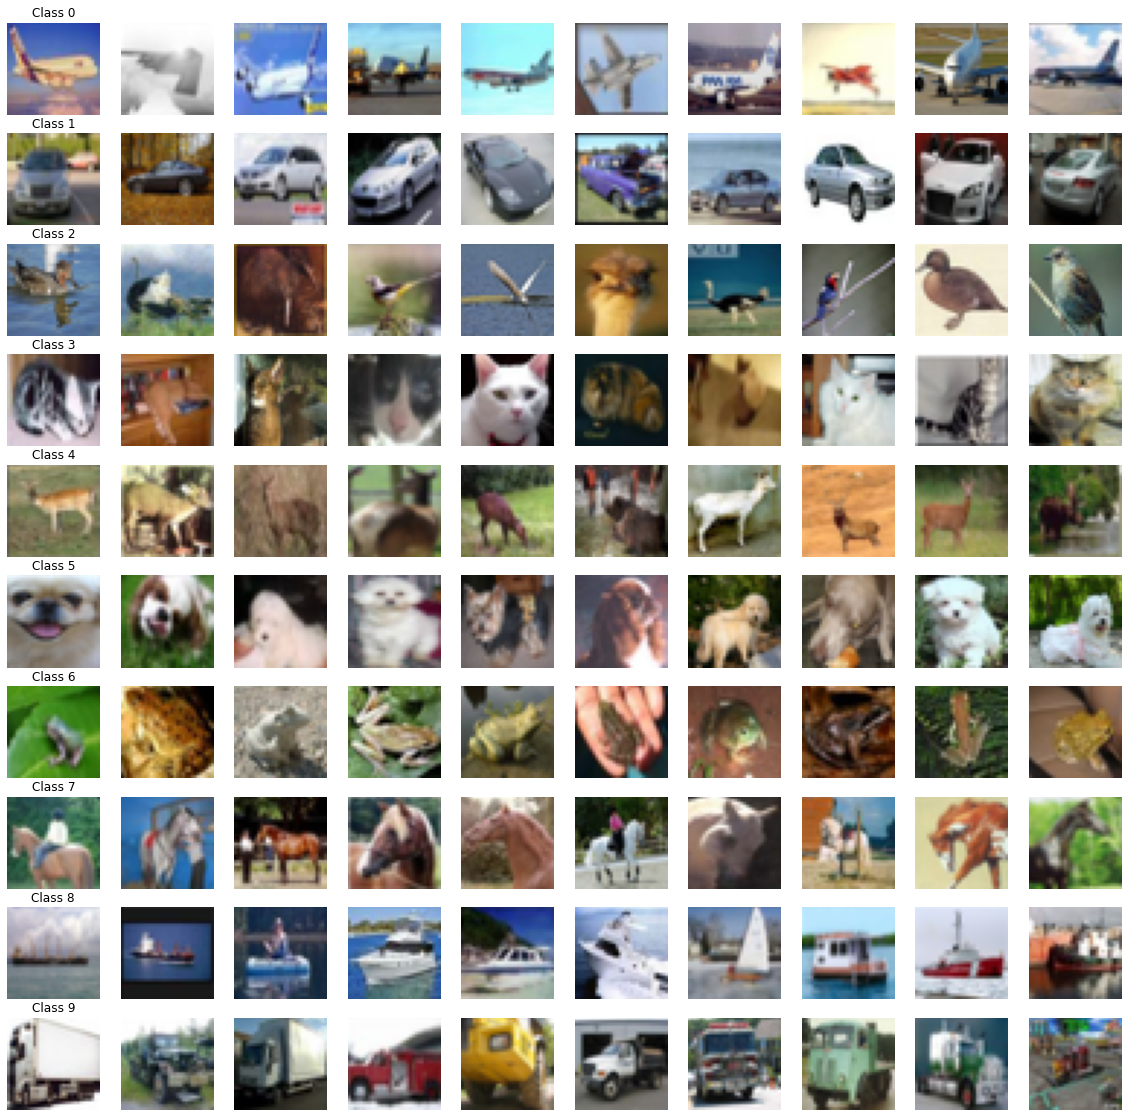

In [12]:
# Load train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Subplot
fig, plots = plt.subplots(10,10, figsize=(20,20))
for i in range(10):
  samples = random.sample(list(np.where(y_train == i)[0]), 10)
  plots[i][0].set_title('Class ' + str(i))
  for j in range(10):
    plots[i][j].imshow(x_train[samples[j]])
    plots[i][j].axis('off')

fig.show()

# One-Hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Data normalization
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

## Define the following model (same as the one in tutorial)

**For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer. Use the input as (32,32,3). The filter maps can then be flattened to provide features to the classifier. Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).**

In [ ]:
clear_session()
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 100)               720100    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 722,006
Trainable params: 722,006
Non-trainable params: 0
__________________________________________________

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 512 epochs with a batch size of 32.

In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model_history = model.fit(x_train, y_train, batch_size=32, epochs=512, validation_split=0.1)

Epoch 1/512
1407/1407 [==============================] - 13s 4ms/step - loss: 1.7799 - accuracy: 0.3606 - val_loss: 1.5741 - val_accuracy: 0.4274
Epoch 2/512
1407/1407 [==============================] - 7s 5ms/step - loss: 1.4633 - accuracy: 0.4810 - val_loss: 1.6997 - val_accuracy: 0.3932
Epoch 3/512
1407/1407 [==============================] - 8s 6ms/step - loss: 1.3214 - accuracy: 0.5341 - val_loss: 1.3433 - val_accuracy: 0.5304
Epoch 4/512
1407/1407 [==============================] - 5s 4ms/step - loss: 1.2251 - accuracy: 0.5690 - val_loss: 1.3110 - val_accuracy: 0.5408
Epoch 5/512
1407/1407 [==============================] - 5s 4ms/step - loss: 1.1537 - accuracy: 0.5962 - val_loss: 1.2560 - val_accuracy: 0.5716
Epoch 6/512
1407/1407 [==============================] - 6s 4ms/step - loss: 1.0935 - accuracy: 0.6194 - val_loss: 1.1962 - val_accuracy: 0.5852
Epoch 7/512
1407/1407 [==============================] - 5s 4ms/step - loss: 1.0410 - accuracy: 0.6378 - val_loss: 1.2414 - val_a

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 512 epochs with a batch size of 32. We will use VGG model as the architecture.

**Stack two convolutional layers with 32 filters, each of 3 x 3. Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. For all the layers, use ReLU activation function. Use same padding for the layers to ensure that the height and width of each layer output matches the input**


In [ ]:
clear_session()
VGG_model = Sequential()
# The padding is added in the convolution layers, in order to keep the shape of the input(32, 32, 3) in the output.
VGG_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3), padding="same"))
VGG_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding="same"))
# Since padding was used in the previous convolution layers, the input in the MaxPooling2D is (32, 32, 3). As the kernel shape used is
# (2, 2), it is inferable that the kernel is able to fit all the information of the input (32/2=integer). According to that,
# it is not necessary to use padding in the MaxPooling2D, because the input shape will not be modified.
VGG_model.add(MaxPooling2D((2, 2)))
VGG_model.add(Flatten())
VGG_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
VGG_model.add(Dense(10, activation='softmax'))
VGG_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 512 epochs with a batch size of 32.

In [ ]:
VGG_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
VGG_model_history = VGG_model.fit(x_train, y_train, batch_size=32, epochs=512, validation_split=0.1)

Epoch 1/512
1407/1407 [==============================] - 15s 5ms/step - loss: 1.7175 - accuracy: 0.3843 - val_loss: 1.5411 - val_accuracy: 0.4530
Epoch 2/512
1407/1407 [==============================] - 6s 4ms/step - loss: 1.3455 - accuracy: 0.5211 - val_loss: 1.3941 - val_accuracy: 0.5058
Epoch 3/512
1407/1407 [==============================] - 6s 4ms/step - loss: 1.1699 - accuracy: 0.5871 - val_loss: 1.1536 - val_accuracy: 0.5948
Epoch 4/512
1407/1407 [==============================] - 6s 4ms/step - loss: 1.0499 - accuracy: 0.6323 - val_loss: 1.1207 - val_accuracy: 0.6044
Epoch 5/512
1407/1407 [==============================] - 6s 5ms/step - loss: 0.9517 - accuracy: 0.6681 - val_loss: 1.0392 - val_accuracy: 0.6320
Epoch 6/512
1407/1407 [==============================] - 6s 4ms/step - loss: 0.8675 - accuracy: 0.6958 - val_loss: 1.0839 - val_accuracy: 0.6270
Epoch 7/512
1407/1407 [==============================] - 6s 4ms/step - loss: 0.7935 - accuracy: 0.7243 - val_loss: 1.1045 - val_a

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.
 

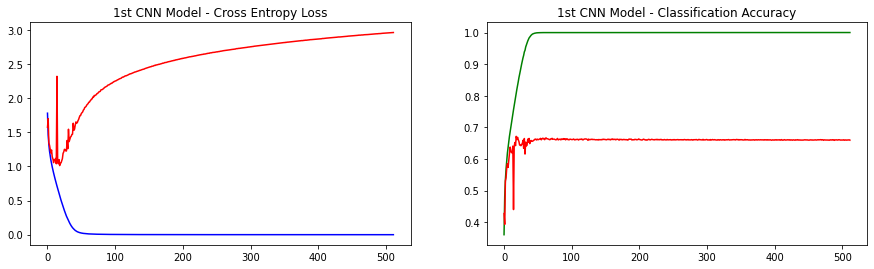

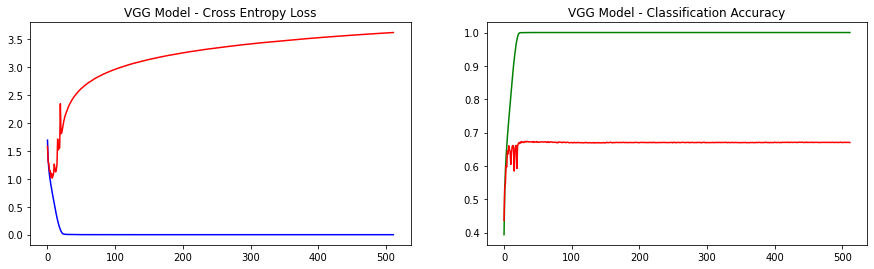

In [ ]:
plt.figure(figsize=(15, 9))

## 1st CNN Model
# Plot Cross Entropy Loss
plt.subplot(221)
plt.title('1st CNN Model - Cross Entropy Loss')
plt.plot(model_history.history['loss'], color='blue', label='train')
plt.plot(model_history.history['val_loss'], color='red', label='val')

# Plot Accuracy
plt.subplot(222)
plt.title('1st CNN Model - Classification Accuracy')
plt.plot(model_history.history['accuracy'], color='green', label='train')
plt.plot(model_history.history['val_accuracy'], color='red', label='val')
plt.show()

## VGG Model
# Plot Cross Entropy Loss
plt.figure(figsize=(15, 9))
plt.subplot(223)
plt.title('VGG Model - Cross Entropy Loss')
plt.plot(VGG_model_history.history['loss'], color='blue', label='train')
plt.plot(VGG_model_history.history['val_loss'], color='red', label='val')

# Plot Accuracy
plt.subplot(224)
plt.title('VGG Model - Classification Accuracy')
plt.plot(VGG_model_history.history['accuracy'], color='green', label='train')
plt.plot(VGG_model_history.history['val_accuracy'], color='red', label='val')
plt.show()

**Solution**

*   By comparing both models on the quantitative results obtained, the final validation accuracy achieved is slightly higher (±2% difference) in the deeper model.

    Furthermore, the training process of both models is not the same. Both start with the same accuracy and loss values, nonetheless, the deeper model (VGG) is able to reach the minimum (or to converge) in approximately 30 epochs, while the first CNN model needs 70 epochs.
    This discrepancy is due to the extra convolution layer with 32 filters in the deeper model. This layer allows a hierarchical decomposition of the input, in which the analysis detail of the image is greater. On the other hand, the training time increases, because there is a necessity of adjusting more parameters. 

    According to the analysis, the deeper model is preferable, as in the majority of the applications. However, it is essential to consider the balance of complexity between data and model to avoid overfitting and the time required in the training process.


*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


In [ ]:
# Prediction
predictions = VGG_model.predict(x_test)
# Select for each observation the highest probability
predictions = np.argmax(predictions, axis=1)
real = np.argmax(y_test, axis=1)
# Confusion matrix
labels = ["planes", "car", "bird", "cat", "deer", "dog", "frog", "horse", "boat", "truck"]
confusionMatrix = confusion_matrix(real, predictions)
print(pd.DataFrame(confusionMatrix, columns=labels, index=labels))

# Classification Report
# The Classification Report is obtained in order to sustain the confusion
# matrix results.
print(classification_report(real, predictions, target_names=labels))

313/313 [==============================] - 1s 2ms/step
        planes  car  bird  cat  deer  dog  frog  horse  boat  truck
planes     706   26    55   28    23    9    24     12    76     41
car         21  777    14   13     7    4     8      8    38    110
bird        79    9   539   76    86   76    57     46    20     12
cat         24   17    78  448    80  187    82     40    20     24
deer        27    3    91   78   572   53    64     83    17     12
dog         19    4    66  193    54  556    27     60    13      8
frog         9    8    54   80    60   45   718      8     5     13
horse       18    8    41   52    68   59     8    709     5     32
boat        77   54    21   20    11    7     6      8   758     38
truck       49  105     9   19     9   18    14     24    40    713
              precision    recall  f1-score   support

      planes       0.69      0.71      0.70      1000
         car       0.77      0.78      0.77      1000
        bird       0.56      0.54 

**Solution**

*   According to the results obtained, overall, the VGG model has a satisfactory performance in the majority of the labels. Firstly, it is important to refer that all the classes are equally represented in the test set. So, this way it is easier to compare different labels.

    The best-classified images are regarding to 'car' or 'boat' with an F1-Score of 77% and 76%, respectively. On the other hand, the algorithm has a poor performance in 'bird', 'dog', 'deer' and, mainly, 'cat'. Thus, overall, the model is better in the identification of vehicles than animals, probably due to the size and shape of those in the images.

    Furthermore, it is also understandable a considerable quantity of false positive (FP) identifications between close-shapped animals, such as 'cat' and 'dog', and vehicles, like 'car' and 'truck'.

    Finally, converging all the results, the accuracy achieved is 65%, which indicates a satisfactory result for the complexity of the model developed. Additionally, in order to increase this value, it would be necessary to increase the depth of the model. This way it would be possible to consider more important details regarding the images.  


*    Print the test accuracy for the trained model.

In [ ]:
# Accuracy
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 3.0539 - accuracy: 0.6485
Test accuracy: 0.6485000252723694


## Define the complete VGG architecture.

**Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer. Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, follwed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling. Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. For all the layers, use ReLU activation function. Use same padding for the layers to ensure that the height and width of each layer output matches the input**

*   Change the size of input to 64 x 64.

In [3]:
clear_session()
# Define the model
VGG_model = Sequential()
# Adding a resizing layer in order to match the input_shape of the Conv2D.
VGG_model.add(tf.keras.layers.Resizing(64, 64))
# The padding is added in the convolution layers, in order to keep the shape of the input(32, 32, 3) in the output.
VGG_model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(64, 64, 3), padding="same"))
VGG_model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding="same"))
# Since padding was used in the previous convolution layers, the input in the MaxPooling2D is (32, 32, 3). As the kernel shape used is
# (2, 2), it is inferable that the kernel is able to fit all the information of the input (32/2=integer). According to that,
# it is not necessary to use padding in the MaxPooling2D, because the input shape will not be modified.
VGG_model.add(MaxPooling2D((2, 2)))
VGG_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding="same"))
VGG_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding="same"))
VGG_model.add(MaxPooling2D((2, 2)))
VGG_model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding="same"))
VGG_model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding="same"))
VGG_model.add(MaxPooling2D((2, 2)))
VGG_model.add(Flatten())
VGG_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
VGG_model.add(Dense(10, activation='softmax'))

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 100 epochs with a batch size of 32.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [4]:
# Compile the model
VGG_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
VGG_model_history = VGG_model.fit(x_train, y_train, batch_size=32, epochs=100, validation_split=0.1)

Epoch 1/100
1407/1407 [==============================] - 44s 26ms/step - loss: 1.6789 - accuracy: 0.3946 - val_loss: 1.7994 - val_accuracy: 0.3806
Epoch 2/100
1407/1407 [==============================] - 39s 27ms/step - loss: 1.2375 - accuracy: 0.5576 - val_loss: 1.4678 - val_accuracy: 0.4890
Epoch 3/100
1407/1407 [==============================] - 38s 27ms/step - loss: 1.0161 - accuracy: 0.6425 - val_loss: 1.0506 - val_accuracy: 0.6296
Epoch 4/100
1407/1407 [==============================] - 38s 27ms/step - loss: 0.8464 - accuracy: 0.7046 - val_loss: 1.0813 - val_accuracy: 0.6238
Epoch 5/100
1407/1407 [==============================] - 39s 28ms/step - loss: 0.6898 - accuracy: 0.7608 - val_loss: 1.1084 - val_accuracy: 0.6482
Epoch 6/100
1407/1407 [==============================] - 38s 27ms/step - loss: 0.5479 - accuracy: 0.8093 - val_loss: 0.9089 - val_accuracy: 0.7094
Epoch 7/100
1407/1407 [==============================] - 37s 26ms/step - loss: 0.4070 - accuracy: 0.8588 - val_loss: 1

In [ ]:
# Prediction
predictions = VGG_model.predict(x_test)
# Select for each observation the highest probability
predictions = np.argmax(predictions, axis=1)
real = np.argmax(y_test, axis=1)
# Confusion matrix
labels = ["planes", "car", "bird", "cat", "deer", "dog", "frog", "horse", "boat", "truck"]
confusionMatrix = confusion_matrix(real, predictions)
print(pd.DataFrame(confusionMatrix, columns=labels, index=labels))
# Classification Report
# The Classification Report is obtained in order to sustain the confusion
# matrix results.
print(classification_report(real, predictions, target_names=labels))

313/313 [==============================] - 3s 9ms/step
        planes  car  bird  cat  deer  dog  frog  horse  boat  truck
planes     794   18    36   17    17    3    17     13    57     28
car         11  853     5    8     5    3     8      5    25     77
bird        51    3   637   68    79   55    55     33    11      8
cat         29    9    55  545    63  163    62     36    24     14
deer        22    3    61   56   691   36    43     73    11      4
dog         16    6    41  165    42  633    34     44    13      6
frog         3    9    44   60    25   27   808     12     6      6
horse       15    2    34   30    54   50     9    793     5      8
boat        54   40    11   11     6    7     5      5   844     17
truck       29   76     7   12     8   11     8     15    24    810
              precision    recall  f1-score   support

      planes       0.78      0.79      0.78      1000
         car       0.84      0.85      0.84      1000
        bird       0.68      0.64 

**Solution**

*   By comparing the values obtained in the complete VGG with the previous model analysed, it is noticed a considerable improvement of 9%, due to the increment of the depth. This allowed the possibility to consider more important details regarding the images to perform the classification. Remarkably, all the classes were positively affected by the increment of the depth in the model's architecture. 

    Furthermore, the relations on the F1-Scores remained the same. Once again, 'cat' registered the worst score (55%), while 'car' and 'boat' reached the best mark of 84%. Additionally, the pattern in which the vehicles are more easily identified than the animals and that close-shaped animals lead to more false positives remained in the current structure. 

    Finally, taking into account the model's complexity to the task required, it can be suggested that it has a suitable performance.


# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Solution**

*   The neurons in a NN work according to the weights, bias and respective activation functions. If the activation function is not defined the neuron is basically a linear regression model. So, the introduction of the activation function permits one to decide when a neuron should be activated by calculating the weighted sum and further adding bias to it. The purpose is to perform a non-linear transformation of the input in the learning process.

*   As the sigmoid function is a type of logistic activation function, it is used for binary classification problems, by converting a linear input into a non-linear one. On the other hand, Softmax is used in multiclass problems, because it converts a linear input into a probabilistic vector.

*   Both cross-entropy loss types correspond to a measurement of the classification model, in which its value increases with the divergence of the predicted probability from the real value. However, they are used in different situations.

    1. A Categorical Crossentropy loss is used in multi-class classifications (more than 2 exclusive classes), such as in the present work, where each example belongs to a single class.
    2. A Binary cross-entropy loss can be seen as a particular case of the previous one because it is applied in binary classifications (2 exclusive classes) or in multi-label classifications (only non-exclusive classes, with a combination of multiple independent binary classifiers).


# Transfer Learning

It is not always necessary to train models from scratch. We can use the knowledge of networks trained on other tasks to learn the task at hand. In this exercise, we will explore the use of pre-trained weights and train on the CIFAR-10 dataset.

*   Create a base imagenet pretrained InceptionV3 model.
    *    Hint: Use tf.keras.applications to create the model
    *    Pay attention to the include_top parameter.


In [ ]:
clear_session()

# Defining the model
base_model = tf.keras.applications.inception_v3.InceptionV3(
    include_top=False,
    weights='imagenet',
    input_shape = (299, 299, 3),
    classes=10
)

87910968/87910968 [==============================] - 1s 0us/step


*    Add a global average pooling layer, followed by a fully-connected layer with 1024 neurons and then the classification layer.

In [ ]:
# Resize + Base Model
final_model = Sequential()
final_model.add(tf.keras.layers.Resizing(299, 299))
final_model.add(base_model)

# Aditional layers
# These layers are trainable by default
add_model = Sequential()
add_model.add(tf.keras.layers.GlobalAveragePooling2D(name='avg_pool'))
add_model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'))
add_model.add(Dense(10, activation='softmax'))

# Joining both models
final_model.add(add_model)

*   Train the model by freezing the base model. Train only the newly added layers.
    *    Hint: Every layer has an attribute called 'trainable'
*   Compile the model and train the model for a few epochs only.

In [ ]:
# Freezing the InceptionV3 model
base_model.trainable = False
print("weights:", len(base_model.weights))
print("trainable_weights:", len(base_model.trainable_weights))
print("non_trainable_weights:", len(base_model.non_trainable_weights))

# The added layers are trainable by default

# Compile the final model
final_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

weights: 376
trainable_weights: 0
non_trainable_weights: 376


In [ ]:
# Train
final_model_history = final_model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/10
1407/1407 [==============================] - 220s 140ms/step - loss: 0.7044 - accuracy: 0.7668 - val_loss: 0.6238 - val_accuracy: 0.7840
Epoch 2/10
1407/1407 [==============================] - 192s 136ms/step - loss: 0.5080 - accuracy: 0.8248 - val_loss: 0.5337 - val_accuracy: 0.8184
Epoch 3/10
1407/1407 [==============================] - 192s 136ms/step - loss: 0.4603 - accuracy: 0.8404 - val_loss: 0.4741 - val_accuracy: 0.8382
Epoch 4/10
1407/1407 [==============================] - 192s 136ms/step - loss: 0.4309 - accuracy: 0.8505 - val_loss: 0.4856 - val_accuracy: 0.8402
Epoch 5/10
1407/1407 [==============================] - 192s 136ms/step - loss: 0.4090 - accuracy: 0.8586 - val_loss: 0.4597 - val_accuracy: 0.8418
Epoch 6/10
1407/1407 [==============================] - 193s 138ms/step - loss: 0.3905 - accuracy: 0.8654 - val_loss: 0.4896 - val_accuracy: 0.8300
Epoch 7/10
1407/1407 [==============================] - 192s 136ms/step - loss: 0.3758 - accuracy: 0.8702 - val_

*    Freeze the bottom layers and unfreeze the base layers.
*    Compile and train the classifier with a very low learning rate (0.0001)

In [ ]:
# Freeze the bottom layers and unfreeze the base layers
base_model.trainable = True
print("weights:", len(base_model.weights))
print("trainable_weights:", len(base_model.trainable_weights))
print("non_trainable_weights:", len(base_model.non_trainable_weights))

add_model.trainable = False
print("\nweights:", len(add_model.weights))
print("trainable_weights:", len(add_model.trainable_weights))
print("non_trainable_weights:", len(add_model.non_trainable_weights))

# Compile the final model
final_model.compile(optimizer=optimizers.SGD(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the final model
final_model_history = final_model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.1)

weights: 376
trainable_weights: 188
non_trainable_weights: 188

weights: 4
trainable_weights: 0
non_trainable_weights: 4


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
1407/1407 [==============================] - 687s 481ms/step - loss: 0.8938 - accuracy: 0.7105 - val_loss: 0.5950 - val_accuracy: 0.8042
Epoch 2/10
1407/1407 [==============================] - 674s 479ms/step - loss: 0.5297 - accuracy: 0.8282 - val_loss: 0.4500 - val_accuracy: 0.8534
Epoch 3/10
1407/1407 [==============================] - 675s 479ms/step - loss: 0.4349 - accuracy: 0.8566 - val_loss: 0.3813 - val_accuracy: 0.8762
Epoch 4/10
1407/1407 [==============================] - 674s 479ms/step - loss: 0.3798 - accuracy: 0.8761 - val_loss: 0.3481 - val_accuracy: 0.8882
Epoch 5/10
1407/1407 [==============================] - 675s 480ms/step - loss: 0.3418 - accuracy: 0.8883 - val_loss: 0.3216 - val_accuracy: 0.8978
Epoch 6/10
1407/1407 [==============================] - 673s 478ms/step - loss: 0.3120 - accuracy: 0.8972 - val_loss: 0.3031 - val_accuracy: 0.9010
Epoch 7/10
1407/1407 [==============================] - 672s 478ms/step - loss: 0.2869 - accuracy: 0.9043 - val_

*    Compare the performance of the VGG model and the Inception-V3 model.

**Solution**

*    According to the values obtained, the Inception-V3 model outperforms the VGG model. In fact, just after 1 epoch, Inception-V3 achieves better results than the deepest VGG model defined after 26 epochs (convergence point).

     This pattern in the values is due to:
     1. Structure of the model: Inception-V3 is deeper with roughly 21 million parameters more than VGG;
     2. The training set: Inception-V3 is trained in ImageNet data set with approximately 14 million images, while VGG uses cifar10 with only 50000 observations.

     Furthermore, it is noticed that Inception-V3 demonstrates a higher capacity for learning since the test accuracy increases along the epochs roughly in the same scale and quantity as the training accuracy. On the other hand, the VGG model quickly loses the capacity of learning information. Consequently, the difference between training and testing accuracy increases along the epochs, indicating an overfitting situation.

*    When do we train models from scratch? What are the potential issues in training models from scratch?

**Solution**

*    It is recommended to train models from scratch, when there is not a sufficient good model already trained that can be applied to the present problem. However, when it exhists it is recommend to use it, because some issues might emerge, such as:

     1. Data and computacional resources needed (money).
     2. Low structural knowledge about the best approach in terms of the layers quantity and disposition. In other words, for complex problems, it is necessary domain expertise in various topics.
     3. More code needed (human effort).

*    Why do we use pre-trained weights?
*    What is the difference between using random initialization and using weights from a pre-trained model?

**Solution**

*    Pre-trained weights are used if there is a model developed satisfactorily enough in the problem domain required. This means that the weights are already optimized to perform the classification/regression, allowing the reduction of the computational resources needed, the time consumption in the training phase and the human effort.

*    In a random initialization, the weights in the first epoch are assigned with random values, which are not optimal and might be distant from the minimum. So, it is necessary to adjust all the weights in order to converge the overall model. As a consequence, computational resources, the time needed and the human effort to train the model are considerably higher. On the other hand, as the pre-trained weights are already optimized and close to the minimum. So, the resources and effort required are significantly less, allowing us to focus more on possible improvements, such as fine-tuning.
     
     Besides that, having a pre-trained model also allows the comparison between different changes (like adding 1 or 2 convolution layers, for example), with a suitable base as a starting point (the original model) to quantify the improvements. 

# Extracting features from Deep Networks

It is quite possible to extract features (similar to SIFT or ORB) from different layers of deep network.

*   Load ResNet50 model with imagenet weights and check the summary of the model
*   Create a model to extract features from the 'avg_pool' layer.
*   Extract features from the layer for all the train images.
*   Use the extracted features to train a SVM classifier.
    *    Use GridSearchCV and SVC to perform the classification

In [13]:
clear_session()
# Defining the model
base_model = tf.keras.applications.resnet50.ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape = (32, 32, 3),
    classes=10
)
base_model.summary()

# Defining the model
final_model = Sequential()
final_model.add(base_model)
final_model.add(tf.keras.layers.GlobalAveragePooling2D(name='avg_pool'))
final_model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'))
final_model.add(Dense(10, activation='softmax'))

# Freezing the base model
base_model.trainable = False

# Extracting the features
model_feat = tf.keras.models.Model(inputs=final_model.input, outputs=final_model.get_layer(name="avg_pool").output)
train_features = model_feat.predict(x_train)
test_features=model_feat.predict(x_test)

# Define C and Gamma
# It is implemented a simple GridSearchCV due to the high computational time
param_grid = {'C': [0.1], 'gamma': [1]} 
GS_SVC = GridSearchCV(SVC(), param_grid)

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

*    Evaluate the trained SVM model using the test set
*    Calculate the accuracy score and confusion matrix

In [ ]:
# Train SVM
# Processing the y data
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)
# Fitting the model for grid search
GS_SVC.fit(train_features, y_train)
# Prediction
y_pred = GS_SVC.predict(train_features)
# Accuracy
print(GS_SVC.score(test_features, y_test))
# Confusion Matrix
labels = ["planes", "car", "bird", "cat", "deer", "dog", "frog", "horse", "boat", "truck"]
confusion_matrix(y_test, y_pred, labels=labels)
print(pd.DataFrame(confusionMatrix, columns=labels, index=labels))
# The code is working and was tested in a small example, since with all the data does
# not reach the result in 3.5 h

# Feature Visualizations

In order to visualize the features of a higher dimension data, t-SNE is used. t-SNE converts the affinities of the data points to probabilities. It recreates the probability distribution in a low-dimensional space. It is very helpful in visualizing features of different layers in a neural network.

You can find more information about t-SNE [here](https://scikit-learn.org/stable/modules/manifold.html#t-distributed-stochastic-neighbor-embedding-t-sne)

*    Use TSNE to visualize the features extracted in the previous exercise.
    *    Hint: TSNE function is available in the *sklearn.manifold* package.

In [ ]:
tsne = manifold.TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(train_features)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 50000 samples in 0.141s...
[t-SNE] Computed neighbors for 50000 samples in 413.715s...
[t-SNE] Computed conditional probabilities for sample 1000 / 50000
[t-SNE] Computed conditional probabilities for sample 2000 / 50000
[t-SNE] Computed conditional probabilities for sample 3000 / 50000
[t-SNE] Computed conditional probabilities for sample 4000 / 50000
[t-SNE] Computed conditional probabilities for sample 5000 / 50000
[t-SNE] Computed conditional probabilities for sample 6000 / 50000
[t-SNE] Computed conditional probabilities for sample 7000 / 50000
[t-SNE] Computed conditional probabilities for sample 8000 / 50000
[t-SNE] Computed conditional probabilities for sample 9000 / 50000
[t-SNE] Computed conditional probabilities for sample 10000 / 50000
[t-SNE] Computed conditional probabilities for sample 11000 / 50000
[t-SNE] Computed conditional probabilities for sample 12000 / 50000
[t-SNE] Computed conditional probabilities for s

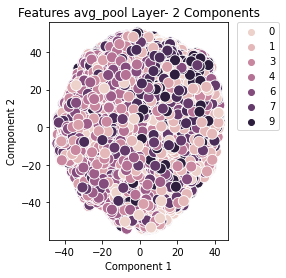

In [ ]:
import pandas as pd
import seaborn as sns
# Plot the result of TSNE for 2 components
#y_train = np.argmax(y_train, axis=1)
tsne_result_df = pd.DataFrame({'Component 1': z[:,0], 'Component 2': z[:,1], 'label': y_train})
fig, ax = plt.subplots(1)
sns.scatterplot(x='Component 1', y='Component 2', hue='label', data=tsne_result_df, ax=ax,s=120).set(title="Features avg_pool Layer- 2 Components")
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

*    Why is feature visualization helpful?

**Solution**

*    Feature visualization is helpful because it indicates the concepts that the NN has learned in the training process. So, it is possible to infer which features in the images the model relies on, in order to identify the class. In general, it is possible to develop a more suitable understanding of the network such as: 

    1. Visually extract some rules used by the NN in the decision-making process.

    2. Interpret the strong and weak points of the model.

    3. It is useful to comprehend better the model architectures.

    4. Finally, helpful to understand better the training process results and the possible origins of the training curves evolution.


---

## **End of P4_1: Image Classification using CNN**
Deadline for P4_1 submission in CampusVirtual is: **Monday, the 24th of November, 2022**